In [6]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, silhouette_score
from joblib import dump, load
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA, TruncatedSVD

In [7]:
df_each = [pd.read_csv(filename, header=None, delimiter=',', names=[f"A{i}" for i in range(11)]) for filename in glob.glob("./data/*.txt")]
df = pd.concat(df_each, axis=0)

In [8]:
df_each

[            A0          A1  A2  A3   A4  A5  A6  A7  A8   A9  A10
 0   493.602410  473.391566  18  33   36   3   6  83  35   63   48
 1   473.000000  243.210526  12   0    0   0   2  12  19   10   22
 2   404.536585  389.012195  12   6    8   2   3  30  38   21   27
 3   496.333333  434.412698  16  17   22   5   5  47  30   41   41
 4   441.895522  447.753731  17  17   19   2   5  61  46   41   42
 5   461.362903  433.846774  17  19   20   1   5  60  38   43   42
 6   299.314103  454.608974  21  30   31   1   6  78  50   60   51
 7   394.648148  436.537037  14   6    7   1   4  40  51   26   34
 8   308.640000  292.500000  11   1    1   0   2  16  20   11   21
 9   353.845455  402.827273  18   8    8   0   4  47  43   28   38
 10  438.102941  407.911765  11   1    3   2   3  21  25   16   26
 11  268.037500  419.737500   9   0    1   1   3  33  27   15   24
 12  369.901515  418.454545  20   1    2   1   5  66  35   26   45
 13  390.287500  422.362500  10   0    1   1   3  31  23   15 

In [9]:
df.head()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,493.602410,473.391566,18,33,36,3,6.0,83.0,35.0,63.0,48.0
1,473.000000,243.210526,12,0,0,0,2.0,12.0,19.0,10.0,22.0
2,404.536585,389.012195,12,6,8,2,3.0,30.0,38.0,21.0,27.0
3,496.333333,434.412698,16,17,22,5,5.0,47.0,30.0,41.0,41.0
4,441.895522,447.753731,17,17,19,2,5.0,61.0,46.0,41.0,42.0


A0) Position in X axis => position X [1, 2, 3, 2, 1] / 5  
A1) Position in Y axis => position Y [200, 150, 130, 170] / 4  
A2) Number of coins collected => Total  
A3) Number of destroyed enemies => Total  
A4) Number of shots => Total  
A5) Number of shots without enemies => Total (A4 - A3)  
A6) Level reach  
A7) key X pressed count  
A8) key Y pressed count  
A9) Number of enemy created  
A10) Number of coin created  

In [10]:
df.shape

(427, 11)

In [11]:
df.describe()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
count,427.000000,427.000000,427.000000,427.000000,427.000000,427.00000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,364.267659,389.551620,10.943794,31.962529,39.498829,7.53630,3.753521,49.516432,23.645540,50.680751,29.723005
std,54.524080,86.032463,7.795305,31.961369,40.565624,11.00642,1.559125,31.419529,26.114295,38.131185,13.259520
min,170.648515,147.392857,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,5.000000,5.000000
25%,330.833621,326.865289,5.000000,2.500000,3.000000,0.00000,3.000000,27.000000,4.000000,20.000000,20.000000
50%,365.328947,407.916667,9.000000,24.000000,30.000000,4.00000,4.000000,45.000000,15.000000,40.000000,29.000000
75%,396.300000,460.200000,16.000000,52.000000,61.500000,10.00000,5.000000,66.000000,33.750000,75.000000,38.000000
max,537.413978,529.130137,44.000000,156.000000,209.000000,65.00000,8.000000,143.000000,117.000000,190.000000,74.000000


In [12]:
df = df.fillna(0)

In [13]:
df_train = df

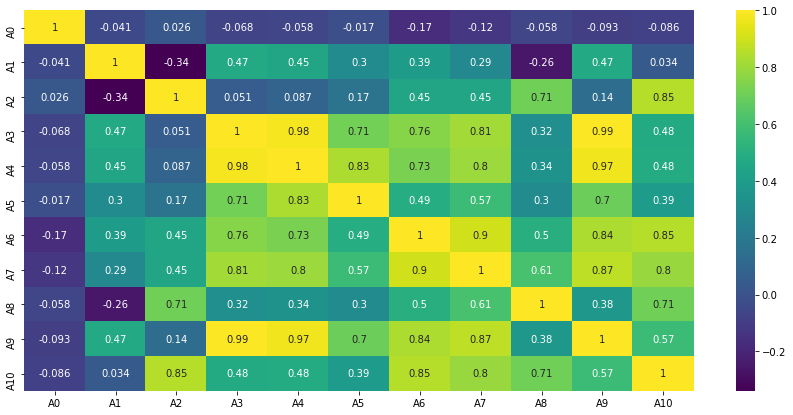

In [14]:
# correlation between feature
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(df_train.corr(),cmap='viridis', annot=True)

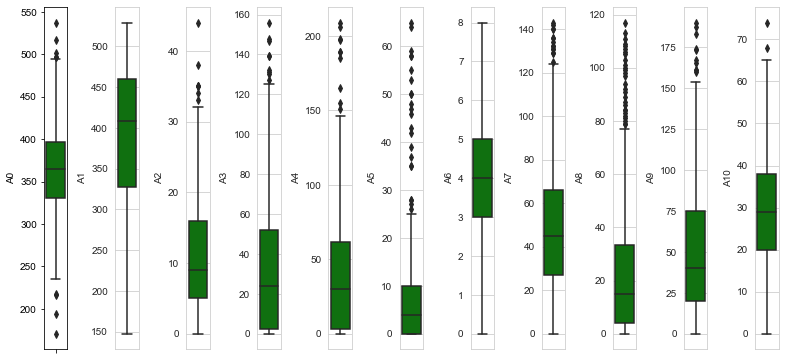

In [15]:
# identify outlier in given feature
l = df_train.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_train[l[i]],color='green',orient='v')
    plt.tight_layout()

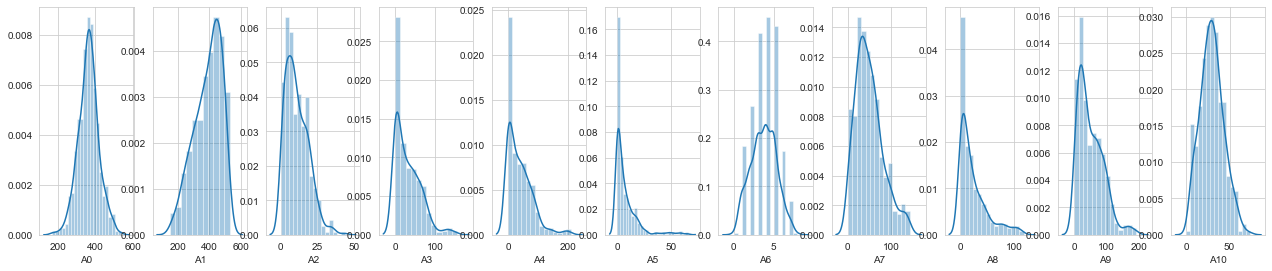

In [16]:
# identidy distribution in each featur
plt.figure(figsize=(2*number_of_columns, 5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1, number_of_columns, i+1)
    sns.distplot(df[l[i]], kde=True) 

In [17]:
scaler = StandardScaler()

In [18]:
scaller_train = scaler.fit_transform(df_train)

In [19]:
scaller_train

array([[ 2.37484912,  0.97565836,  0.90624841, ...,  0.43752518,
         0.3262789 ,  1.37879903],
       [ 1.99654697, -1.70299384,  0.13565152, ..., -0.17601588,
        -1.06404641, -0.57517427],
       [ 0.7394194 , -0.00627737,  0.13565152, ...,  0.55256413,
        -0.77548833, -0.19941017],
       ...,
       [ 0.37058883, -0.24042306,  0.52094997, ...,  0.20744728,
         0.92962761,  0.77757648],
       [-0.43532085, -0.86035364,  0.00721871, ...,  0.4758715 ,
         0.35251145,  0.1012011 ],
       [ 0.06853337,  1.2853048 , -1.40554226, ..., -0.90459588,
        -1.14274407, -1.8527722 ]])

Train K-mean and apply 4 cluster

In [20]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(scaller_train)
kmeans.labels_

array([3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 3, 0, 0, 2, 3, 3,
       2, 2, 3, 0, 0, 0, 2, 0, 2, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 2, 2, 0, 2, 2, 0, 3, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2,
       2, 2, 2, 3, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 3, 2, 0, 3,
       0, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2,
       2, 2, 3, 3, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 3, 3,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 3, 0, 2, 2, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 1, 1, 1, 0, 2, 3,
       3, 2, 3, 2, 3, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 3,

In [21]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print("label:", unique)
print("counts:", counts)

label: [0 1 2 3]
counts: [127  45 162  93]


In [22]:
silhouette_score(scaller_train, kmeans.labels_)

0.2951314454318174

In [23]:
df_train['Y'] = kmeans.labels_
df_train

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Y
0,493.602410,473.391566,18,33,36,3,6.0,83.0,35.0,63.0,48.0,3
1,473.000000,243.210526,12,0,0,0,2.0,12.0,19.0,10.0,22.0,2
2,404.536585,389.012195,12,6,8,2,3.0,30.0,38.0,21.0,27.0,2
3,496.333333,434.412698,16,17,22,5,5.0,47.0,30.0,41.0,41.0,3
4,441.895522,447.753731,17,17,19,2,5.0,61.0,46.0,41.0,42.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
46,371.075758,302.606061,9,28,29,1,3.0,30.0,22.0,42.0,24.0,2
47,367.201754,354.780702,9,59,63,4,4.0,67.0,20.0,79.0,29.0,0
48,384.450000,368.891667,15,62,73,11,5.0,89.0,29.0,86.0,40.0,0
49,340.560000,315.620000,11,44,45,1,4.0,67.0,36.0,64.0,31.0,3


In [24]:
df_train.groupby(['Y']).mean()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
Y,,,,,,,,,,,
0,348.910761,455.105051,7.661417,52.409449,62.102362,9.692913,4.645669,63.157480,10.102362,75.433071,30.889764
1,371.648408,420.807779,18.000000,93.155556,120.644444,27.488889,6.044444,107.888889,70.822222,123.155556,48.222222
2,372.821458,366.710572,6.185185,10.425926,13.290123,2.864198,2.185185,20.888889,10.617284,21.283951,17.080247
3,366.767413,324.696102,20.301075,11.946237,15.021505,3.075269,4.118280,51.978495,41.752688,32.473118,40.881720


In [25]:
mean_collected_coin = list(df_train.groupby(['Y']).mean()['A2'])
mean_enemies_kills = list(df_train.groupby(['Y']).mean()['A3'])
print(mean_enemies_kills)
print(mean_collected_coin)

[52.40944881889764, 93.15555555555555, 10.425925925925926, 11.946236559139784]
[7.661417322834645, 18.0, 6.185185185185185, 20.301075268817204]


In [26]:
labels = []
num_labels = len(mean_collected_coin)
for i in range(num_labels):
    if i % 2 == 0:
        sorted_index = np.argsort(mean_collected_coin)
    else:
        sorted_index = np.argsort(mean_enemies_kills)

    sorted_index = list(sorted_index)
    sorted_index.reverse()
    for max_index in sorted_index:
        if max_index not in labels:
            labels.append(max_index)
            break

print(labels)

LABELS = {
    labels[0]: 'Hardcore Achiever',
    labels[1]: 'Hardcore Killer',
    labels[2]: 'Casual Achiever',
    labels[3]: 'Casual Killer',
}
print(LABELS)

[3, 1, 0, 2]
{3: 'Hardcore Achiever', 1: 'Hardcore Killer', 0: 'Casual Achiever', 2: 'Casual Killer'}


In [27]:
sorted_index

[1, 0, 3, 2]

Train decision tree

In [62]:
X = df_train.iloc[:, 0:11]
X

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,493.602410,473.391566,18,33,36,3,6.0,83.0,35.0,63.0,48.0
1,473.000000,243.210526,12,0,0,0,2.0,12.0,19.0,10.0,22.0
2,404.536585,389.012195,12,6,8,2,3.0,30.0,38.0,21.0,27.0
3,496.333333,434.412698,16,17,22,5,5.0,47.0,30.0,41.0,41.0
4,441.895522,447.753731,17,17,19,2,5.0,61.0,46.0,41.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...
46,371.075758,302.606061,9,28,29,1,3.0,30.0,22.0,42.0,24.0
47,367.201754,354.780702,9,59,63,4,4.0,67.0,20.0,79.0,29.0
48,384.450000,368.891667,15,62,73,11,5.0,89.0,29.0,86.0,40.0
49,340.560000,315.620000,11,44,45,1,4.0,67.0,36.0,64.0,31.0


In [63]:
y = df_train.iloc[:, 11]
y

0     2
1     0
2     0
3     2
4     2
     ..
46    0
47    1
48    1
49    2
50    0
Name: Y, Length: 427, dtype: int32

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [65]:
dt_scaler = StandardScaler()

In [66]:
X_train_scale = dt_scaler.fit_transform(X_train)
X_train_scale

array([[ 0.69313003, -0.99059419,  0.25762977, ..., -0.08742214,
        -0.95120496, -0.13865571],
       [-1.23929515,  0.18778661, -1.02114389, ...,  0.7972899 ,
        -0.13003815, -0.89154736],
       [ 0.94909824,  0.25475342,  0.76913923, ..., -0.58747677,
         0.3997469 ,  0.91539261],
       ...,
       [ 0.39898753, -0.4906778 , -0.63751179, ..., -0.0489564 ,
         0.13485437, -0.66567987],
       [ 0.17691365, -0.03151437, -1.40477599, ...,  1.60507045,
         1.61825249, -0.3645232 ],
       [ 0.56301665,  1.32698251,  0.00187503, ..., -0.62594251,
         1.0619782 ,  0.46365762]])

In [67]:
gbt_clf = GradientBoostingClassifier()
accuracies = cross_val_score(gbt_clf, X_train_scale, y_train, cv=10)
print(accuracies.mean())

0.9500840336134454


In [68]:
dt_clf = DecisionTreeClassifier()
accuracies = cross_val_score(dt_clf, X_train_scale, y_train, cv=10)
print(accuracies.mean())

0.9236134453781514


In [69]:
rbt_clf = RandomForestClassifier()
accuracies = cross_val_score(rbt_clf, X_train_scale, y_train, cv=10)
print(accuracies.mean())

0.9677310924369747


In [74]:
clf = RandomForestClassifier()
clf.fit(X_train_scale, y_train)

X_test_scale = dt_scaler.transform(X_test)
y_pred = clf.predict(X_test_scale)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        31
           1       0.95      0.95      0.95        22
           2       0.95      0.83      0.88        23
           3       1.00      1.00      1.00        10

    accuracy                           0.93        86
   macro avg       0.95      0.94      0.94        86
weighted avg       0.93      0.93      0.93        86



In [75]:
dump(clf, '../SpaceWars/model/model.h5')

['../SpaceWars/model/model.h5']

In [76]:
dump(dt_scaler, '../SpaceWars/model/scaler.bin')

['../SpaceWars/model/scaler.bin']

In [77]:
print(LABELS)

{2: 'Hardcore Achiever', 3: 'Hardcore Killer', 1: 'Casual Achiever', 0: 'Casual Killer'}
